In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [38]:
df = pd.read_csv('data.csv')

In [39]:
df['gender'] = df['gender'].map({'Female': 1, 'Male': 2,'Other':3})
df['smoking_history'] = df['smoking_history'].map({'never': 0, 'current': 2, 'No Info': -1,'former': 1,'No current' :-2})

In [40]:
print(df.shape)

(16964, 9)


In [41]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,2,10.0,0,0,-1.0,16.83,4.0,155,0
1,1,3.0,0,0,-1.0,27.32,3.5,126,0
2,1,42.0,0,0,0.0,24.69,5.0,140,0
3,1,70.0,0,0,0.0,27.32,4.5,159,0
4,1,20.0,0,0,0.0,18.51,4.8,80,0


In [42]:
X = df.drop(['diabetes'], axis = 1)
Y = df.diabetes

In [43]:
imputer = SimpleImputer(strategy='mean')

In [44]:
# Áp dụng imputer cho dữ liệu gốc để xử lý NaN
X = imputer.fit_transform(X)  # Fit và transform dữ liệu gốc

In [45]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [46]:
# Định nghĩa mô hình Decision Tree
model = DecisionTreeClassifier(splitter='random')

In [47]:
# Huấn luyện mô hình
model.fit(X_train, Y_train)

DecisionTreeClassifier(splitter='random')

In [48]:
# Dự đoán trên tập kiểm tra
Y_pred = model.predict(X_test)

In [49]:
# Tính toán độ chính xác
accuracy = metrics.accuracy_score(Y_test, Y_pred) * 100
print("Accuracy:", accuracy)

Accuracy: 87.47421161214265


In [50]:
# Dự đoán cho dữ liệu gốc đã được xử lý
predictions_on_original_data = model.predict(X)
probabilities_on_original_data = model.predict_proba(X)  # Đảm bảo biến này được định nghĩa

In [51]:
# In kết quả dự đoán
print("Dự đoán cho dữ liệu gốc:")
print("Lớp dự đoán:", predictions_on_original_data)
print("Xác suất dự đoán:", probabilities_on_original_data)

Dự đoán cho dữ liệu gốc:
Lớp dự đoán: [0 0 0 ... 1 1 1]
Xác suất dự đoán: [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


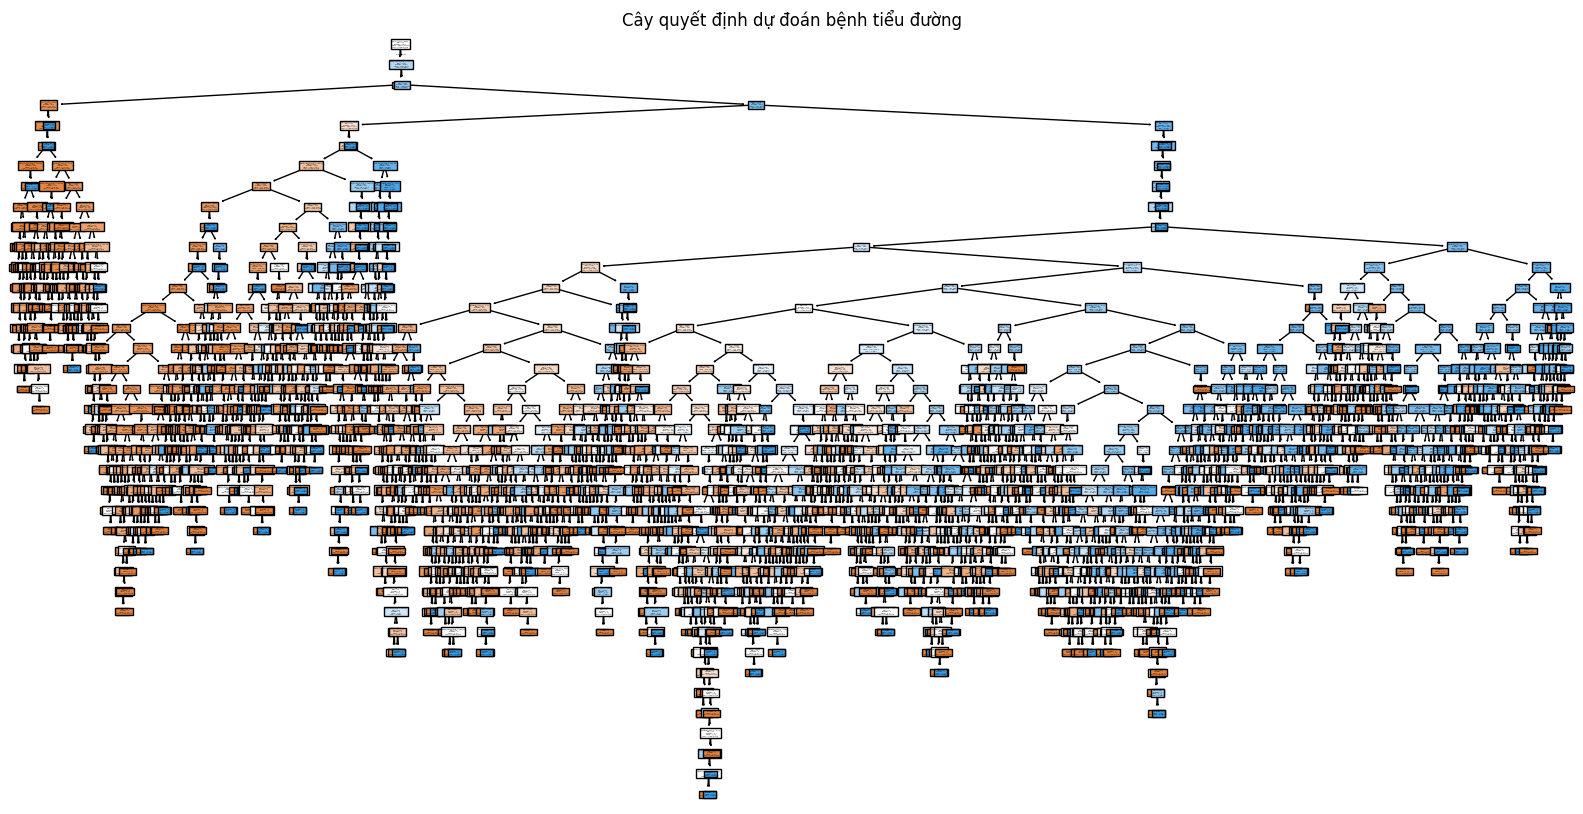

In [52]:
# Vẽ cây quyết định
plt.figure(figsize=(20,10))
# Chuyển đổi X_train thành DataFrame để lấy tên cột
plot_tree(model, feature_names=df.drop(['diabetes'], axis=1).columns, class_names=['Không có bệnh', 'Có bệnh'], filled=True)
plt.title('Cây quyết định dự đoán bệnh tiểu đường')
plt.show()

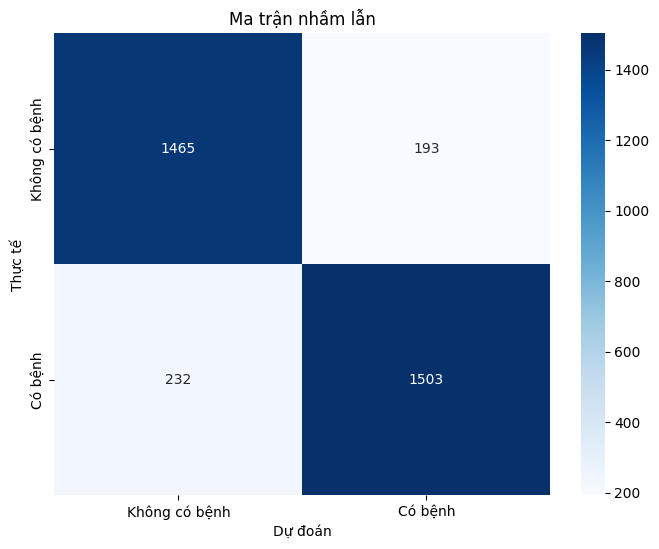

In [53]:
cm = confusion_matrix(Y_test, Y_pred)  # Tính toán ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Không có bệnh', 'Có bệnh'], yticklabels=['Không có bệnh', 'Có bệnh'])
plt.ylabel('Thực tế')
plt.xlabel('Dự đoán')
plt.title('Ma trận nhầm lẫn')
plt.show()

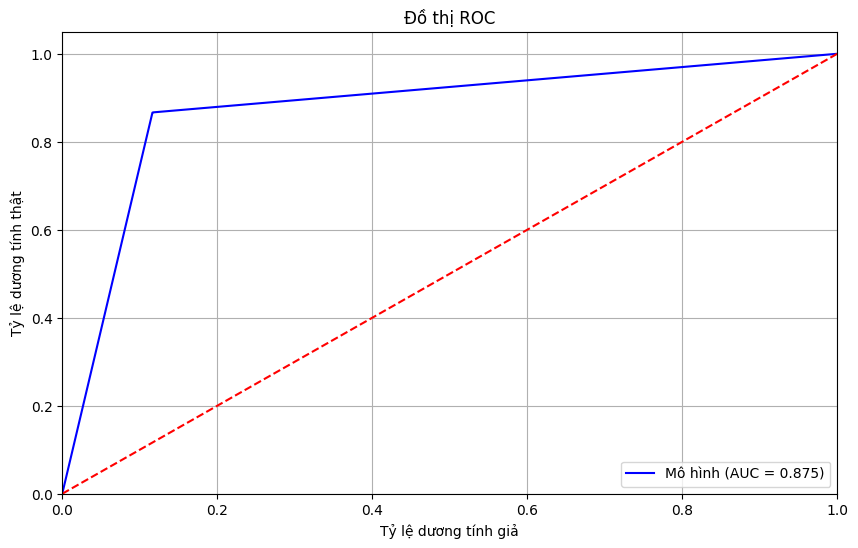

In [54]:
# Dự đoán xác suất cho tập kiểm tra
Y_prob = model.predict_proba(X_test)[:, 1]  # Lấy xác suất cho lớp dương tính

# Tính toán các giá trị ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)

# Tính toán AUC
roc_auc = auc(fpr, tpr)

# Vẽ đồ thị ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Mô hình (AUC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Đường ngẫu nhiên
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tỷ lệ dương tính giả')
plt.ylabel('Tỷ lệ dương tính thật')
plt.title('Đồ thị ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()
